# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Read the Data

In [2]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [9]:
data.head()
data.isna()
print(f"The Orignal data has {data.shape[0]} columns and {data.shape[1]} rows")

# Drop Nan values from the Database.
clean_data =data.dropna()
clean_data.shape

# Find and remove all duplicate files
duplicates = clean_data[clean_data.duplicated(keep="first")]
duplicates

The Orignal data has 5391 columns and 6 rows


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [12]:
clean_data.head()

# Convert the Values with USD to integers
clean_data.USD_Production_Budget = clean_data.USD_Production_Budget.astype(str).str.replace('$', '')
clean_data.USD_Production_Budget = clean_data.USD_Production_Budget.astype(str).str.replace(',', '')
clean_data.USD_Production_Budget = pd.to_numeric(clean_data.USD_Production_Budget)

# Replacing the , and $ with nothing
clean_data.USD_Worldwide_Gross = clean_data.USD_Worldwide_Gross.astype(str).str.replace('$', '')
clean_data.USD_Worldwide_Gross = clean_data.USD_Worldwide_Gross.astype(str).str.replace(',', '')
clean_data.USD_Worldwide_Gross = pd.to_numeric(clean_data.USD_Worldwide_Gross)

# Replacing the , and $ with nothing
clean_data.USD_Domestic_Gross = clean_data.USD_Domestic_Gross.astype(str).str.replace('$', '')
clean_data.USD_Domestic_Gross = clean_data.USD_Domestic_Gross.astype(str).str.replace(',', '')
clean_data.USD_Domestic_Gross = pd.to_numeric(clean_data.USD_Domestic_Gross)

clean_data.head()

C:\Users\EMMANUEL\AppData\Local\Temp\ipykernel_11160\3662635917.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean_data.USD_Production_Budget = clean_data.USD_Production_Budget.astype(str).str.replace('$', '')
C:\Users\EMMANUEL\AppData\Local\Temp\ipykernel_11160\3662635917.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean_data.USD_Worldwide_Gross = clean_data.USD_Worldwide_Gross.astype(str).str.replace('$', '')
C:\Users\EMMANUEL\AppData\Local\Temp\ipykernel_11160\3662635917.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal string

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [20]:
# converting the release date column to a datetime module
clean_data['Release_Date'] = pd.to_datetime(clean_data['Release_Date'])
clean_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [25]:
# Average Production budget of the films in the Dataset
print(f"The average Production budget of the films in the data_set is: ${round(clean_data.USD_Production_Budget.mean(), 2)}")
print(f"The average World_wide Gross of the films in the data_set is: ${round(clean_data.USD_Worldwide_Gross.mean(), 2)}")
print(f"The minimum for the Worldwide revenue was: ${clean_data.USD_Worldwide_Gross.min()} \nThe minimum for domestic Revenue was: ${clean_data.USD_Domestic_Gross.min()}")

clean_data.describe()

The average Production budget of the films in the data_set is: $31113737.58
The average World_wide Gross of the films in the data_set is: $88855421.96
The minimum for the Worldwide revenue was: $0 
The minimum for domestic Revenue was: $0


,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [37]:
df_domestic_0 = clean_data[clean_data.USD_Domestic_Gross == 0]
df_domestic_0 = df_domestic_0.sort_values("USD_Production_Budget", ascending=False)

print("THe HIGHEST BUDGET FILMS THAt HAD NO REVENUE DOMESTICALLY")
df_domestic_0.head()

THe HIGHEST BUDGET FILMS THAt HAD NO REVENUE DOMESTICALLY


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [36]:
df_global_0 = clean_data[clean_data.USD_Worldwide_Gross == 0]
df_global_0 = df_global_0.sort_values("USD_Production_Budget", ascending=False)
df_global_0.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [39]:
# Filtering with the query() method
# Geetting list of all the movies that made a worldwide revenue and didnt make any in the United states
new_data = clean_data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0')
new_data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [43]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
future_releases = clean_data[clean_data.Release_Date >= scrape_date]
future_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [45]:
films_lost_money = clean_data[clean_data['USD_Production_Budget'] > clean_data['USD_Worldwide_Gross']]
films_lost_money.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
15,4738,1936-05-02,Modern Times,1500000,165049,163245
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0


# Seaborn for Data Viz: Bubble Charts

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2018, 2018, 2018, 2018, 2020, 2020, 2020],
           dtype='int64', name='Release_Date', length=5391)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



In [ ]:
# Adding a Decade Column to the dataframe

# First we create a new datetime index object and pass the year attribute to a variabe called 'years'
years = pd.DatetimeIndex(clean_data.Release_Date).year
print(years)

clean_data['Decade'] = years // 10 * 10
clean_data.head()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [68]:
# Separating the old movies from the new movies

old_movies_df = clean_data[clean_data['Decade'] < 1970 ]
new_movies_df = clean_data[clean_data['Decade'] >= 1970]


old_movies_df.head()


The Number of movies made before the 1970 decade: 153
The number of movies made after the 1970 decade: 5238


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [ ]:
# Number of movies per tume
print(f"The Number of movies made before the 1970 decade: {old_movies_df.shape[0]}")
print(f"The number of movies made after the 1970 decade: {new_movies_df.shape[0]}")

# Seaborn Regression Plots

In [71]:
# Finding the most expensive Movie prior to 1970 and saving it as 
old_movies_df.sort_values("USD_Production_Budget", ascending=False)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
147,5228,1969-07-25,The Stewardesses,200000,25000000,13500000,1960
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

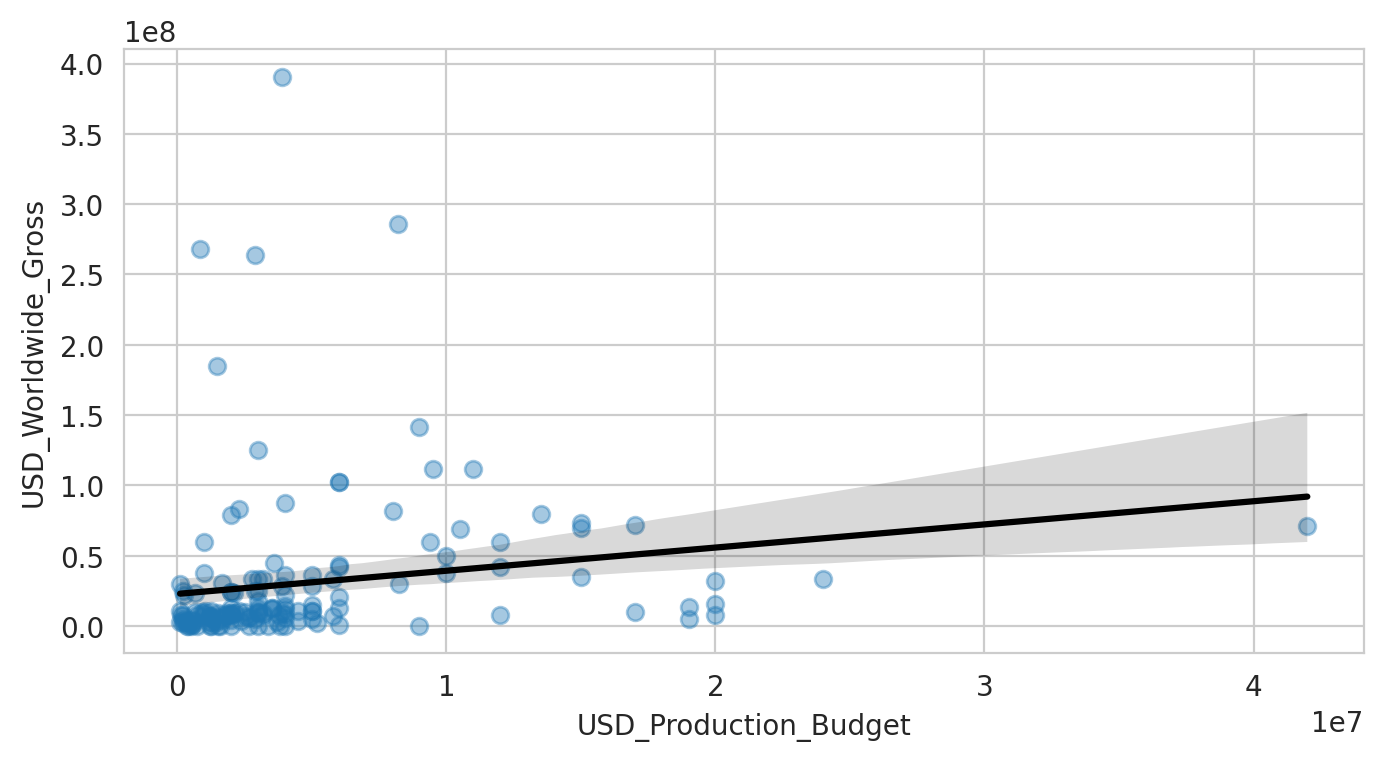

In [78]:
# Using seaborn to create scatter plots for the old_movies Data
# sns.regplot(data=old_movies_df,
#            x='USD_Production_Budget',
#            y='USD_Worldwide_Gross')


# Customizing with matplotlib 
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('whitegrid'):
    sns.regplot(data=old_movies_df,
               x='USD_Production_Budget',
               y='USD_Worldwide_Gross',
               scatter_kws={'alpha': 0.4},
               line_kws={'color': 'black'})


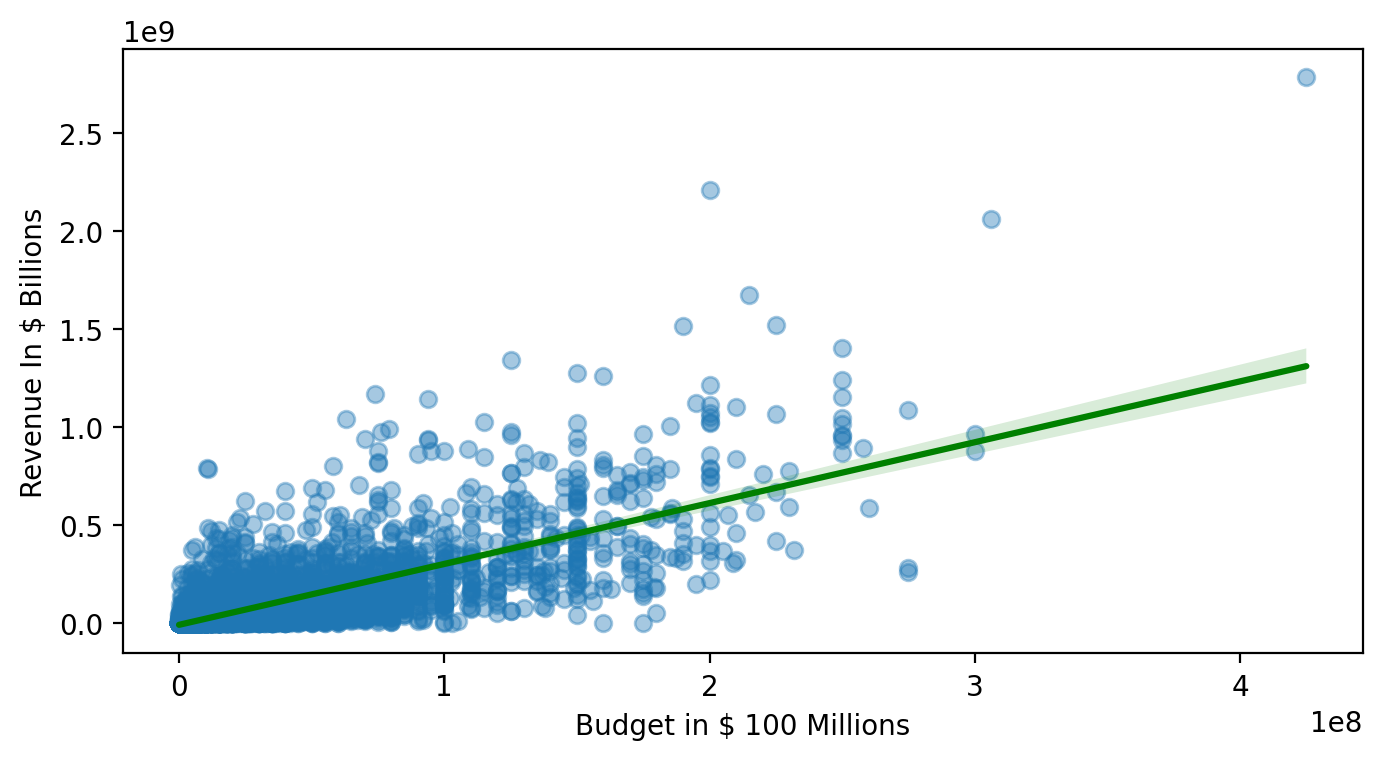

In [86]:
# Drawing a Scatter plot for the New_movies dataframe
plt.figure(figsize=(8, 4), dpi=200)

# Label  and y axis
plt.xlabel('Budget in $ Billions')
plt.ylabel('Revenue in $ Billions')

with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_movies_df,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                line_kws={'color': 'green'},
                scatter_kws={'alpha': 0.4}
               )
    ax.set(ylabel="Revenue In $ Billions",
           xlabel="Budget in $ 100 Millions")

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [94]:
from sklearn.linear_model import LinearRegression

# Create a Linear regression object to help with the data called reg

reg = LinearRegression()

# Explanatory Variable or Feature, i.e the independent Variable
x = pd.DataFrame(new_movies_df, columns=['USD_Production_Budget'])

# Response Variable or Target i.e the dependent Variable
y = pd.DataFrame(new_movies_df, columns=['USD_Worldwide_Gross'])


reg.fit(x, y)
print(reg.intercept_, reg.coef_)

# R squared 
reg.score(x, y)

[-8338272.43659511] [[3.10151167]]


0.5529880674636849

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [99]:
# Running a regression model for the OLD moives 

# Explanatotry Variable or Feature
x = pd.DataFrame(old_movies_df, columns=['USD_Production_Budget'])
                 
# Response Variable or Target
y = pd.DataFrame(old_movies_df, columns=['USD_Worldwide_Gross'])

# Get Regression Equation
reg.fit(x, y)

print(reg.intercept_, reg.coef_)

# Getting our R squared
r_squared = reg.score(x, y)
print(r_squared)

[22821538.63508038] [[1.64771314]]
0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 